In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_pickle('train/logs/ddpg_data.pkl')
df.head()

,state,action,c,Q
0,"[-1.0, -1.0, -8.0]",[-2.0],0,[]
1,"[-1.0, -1.0, -8.0]",[-1.0],0,[]
2,"[-1.0, -1.0, -8.0]",[0.0],0,[]
3,"[-1.0, -1.0, -8.0]",[1.0],0,[]
4,"[-1.0, -1.0, -8.0]",[2.0],0,[]


We divided our action and observation space into 5 bins, therefore we should have a total of 5*5*5*5 rows. <br/>
5^3 for (1,3) state vector and another 5 for action vector.

In [2]:
total_rows = df.shape[0]
print("rows:",total_rows)

rows: 625


We can see a (1,3) state vector and (1,1) action vector.<br/>
They both occured 0 times therefore has no Q history.<br/>
Lets see How many State Action pairs never occured:

In [3]:
never_occured = df[df.c==0].shape[0]

print((never_occured*100)/total_rows,"% never occured")

61.76 % never occured


Let's demonstrate the Q function history for the most selected action_state pairs:

In [4]:
most_c = df[df.c == df.c.max()]
most_c

,state,action,c,Q
569,"[1.0, 0.0, 4.0]",[2.0],18801,"[-34.07399, -33.94677, -33.910908, -34.01233, ..."


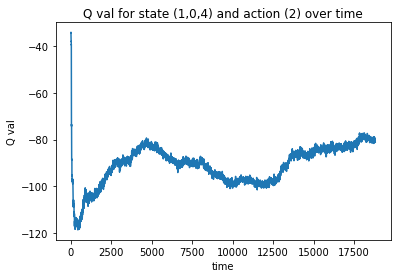

In [5]:
y = most_c.Q.iloc[0]
x = range(len(y))
plt.xlabel('time')
plt.ylabel('Q val')
plt.title('Q val for state (1,0,4) and action (2) over time')
plt.plot(x,y)